In [1]:
import pandas as pd
import yfinance as yf
import datetime

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

keras = tf.keras

In [2]:
def movement_of_spy(interval):
    #This function calculates how much SPY moves on a daily basis
    #Close Diff is the difference between Today's Close and yesterday's Close
    #Open Close Diff is the difference between yesterday's Open and today's close
    df= yf.download("SPY", interval=interval)
    df['Close Diff']=''
    df['Open Close Diff']=''
    df=df.reset_index()

    df.loc[0,['Close Diff']]=0
    df['Open Close Diff']=0
    for i in range(len(df)-1):
        prev=df.loc[i,['Close']]['Close']
        next_=df.loc[i+1,['Close']]['Close']
        df.loc[i+1,['Close Diff']]=abs(next_-prev)

        prev=df.loc[i,['Open']]['Open']
        next_=df.loc[i+1,['Close']]['Close']
        df.loc[i+1,['Open Close Diff']]=abs(next_-prev)
    return df
                                

In [7]:
df=movement_of_spy('1wk')


[*********************100%***********************]  1 of 1 completed


In [13]:
df.tail(4*4)

,Date,Open,High,Low,Close,Adj Close,Volume,Close Diff,Open Close Diff
1585,2023-06-12,430.920013,443.899994,430.170013,439.459991,436.294647,497040500,9.559998,11.179993
1586,2023-06-19,437.450012,438.369995,432.470001,433.209991,431.687286,315854400,6.25,2.289978
1587,2023-06-26,432.619995,444.299988,431.190002,443.279999,441.721893,394077100,10.070007,5.829987
1588,2023-07-03,442.920013,444.079987,437.059998,438.549988,437.008514,257946200,4.730011,5.929993
1589,2023-07-10,438.179993,451.359985,437.589996,449.279999,447.700806,361018800,10.730011,6.359985
1590,2023-07-17,449.130005,456.429993,449.079987,452.179993,450.590607,341153300,2.899994,14.000000
1591,2023-07-24,453.369995,459.440002,451.549988,456.920013,455.313965,352473700,4.740021,7.790009
1592,2023-07-31,457.410004,458.160004,446.269989,446.809998,445.239471,375593700,10.110016,6.559998
1593,2023-08-07,448.709991,451.700012,443.350006,445.649994,444.083557,370178500,1.160004,11.760010
1594,2023-08-14,444.700012,448.109985,433.010010,436.500000,434.965729,398151800,9.149994,12.209991


In [12]:
max(df.tail(4*4)['Close Diff'])

12.949981689453125

Hypothesis here is that an iron condor strategy that makes a profit as long as the price is greater than the current closing price plus the maximum price change of in the last quarter can be used to make a profit

In [14]:
#For example, SPY closed 427.48 as of 29th sep 2023
427.48+12.94

440.42

[*********************100%***********************]  1 of 1 completed
Epoch 1/500
9/9 [==============================] - 4s 141ms/step - loss: 158.3741 - mae: 158.8741 - val_loss: 394.4759 - val_mae: 394.9759
Epoch 2/500
9/9 [==============================] - 1s 59ms/step - loss: 155.7419 - mae: 156.2419 - val_loss: 380.6635 - val_mae: 381.1635
Epoch 3/500
9/9 [==============================] - 1s 57ms/step - loss: 144.7077 - mae: 145.2077 - val_loss: 321.6996 - val_mae: 322.1996
Epoch 4/500
9/9 [==============================] - 1s 62ms/step - loss: 101.9047 - mae: 102.4047 - val_loss: 103.1846 - val_mae: 103.6841
Epoch 5/500
9/9 [==============================] - 1s 58ms/step - loss: 44.8440 - mae: 45.3413 - val_loss: 88.6851 - val_mae: 89.1851
Epoch 6/500
9/9 [==============================] - 1s 54ms/step - loss: 30.2625 - mae: 30.7578 - val_loss: 48.6362 - val_mae: 49.1322
Epoch 7/500
9/9 [==============================] - 1s 62ms/step - loss: 16.4976 - mae: 16.9900 - val_loss: 34.

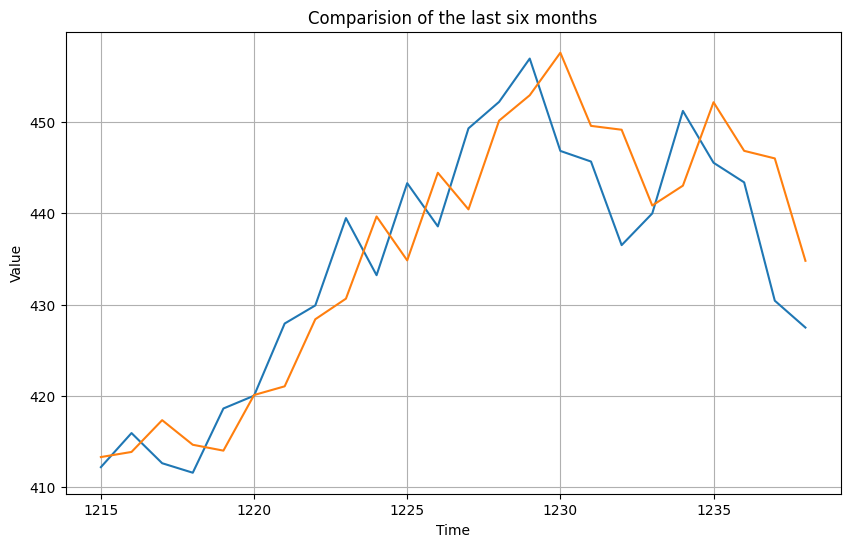

In [23]:
def lets_train_the_model(stock_symbol='SPY',interval='1wk', start_date = "2000-01-01",end_date = "2023-9-27"): 
    def plot_series(time, series, format="-", start=0, end=None, label=None):
        plt.plot(time[start:end], series[start:end], format, label=label)
        plt.xlabel("Time")
        plt.ylabel("Value")
        if label:
            plt.legend(fontsize=14)
        plt.grid(True)


    def trend(time, slope=0):
        return slope * time


    def seasonal_pattern(season_time):
        """Just an arbitrary pattern, you can change it if you wish"""
        return np.where(season_time < 0.4,
                        np.cos(season_time * 2 * np.pi),
                        1 / np.exp(3 * season_time))


    def seasonality(time, period, amplitude=1, phase=0):
        """Repeats the same pattern at each period"""
        season_time = ((time + phase) % period) / period
        return amplitude * seasonal_pattern(season_time)


    def white_noise(time, noise_level=1, seed=None):
        rnd = np.random.RandomState(seed)
        return rnd.randn(len(time)) * noise_level


    def seq2seq_window_dataset(series, window_size, batch_size=32,
                               shuffle_buffer=1000):
        series = tf.expand_dims(series, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(series)
        ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
        ds = ds.flat_map(lambda w: w.batch(window_size + 1))
        ds = ds.shuffle(shuffle_buffer)
        ds = ds.map(lambda w: (w[:-1], w[1:]))
        return ds.batch(batch_size).prefetch(1)


    def model_forecast(model, series, window_size):
        ds = tf.data.Dataset.from_tensor_slices(series)
        ds = ds.window(window_size, shift=1, drop_remainder=True)
        ds = ds.flat_map(lambda w: w.batch(window_size))
        ds = ds.batch(32).prefetch(1)
        forecast = model.predict(ds)
        return forecast

    
    

    
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)

    series=np.array(data['Close'])
    time=list(range(len(series)))

    split_time = int(len(data)*0.85)
    time_train = time[:split_time]
    x_train = series[:split_time]
    time_valid = time[split_time:]
    x_valid = series[split_time:]

    keras.backend.clear_session()
    tf.random.set_seed(42)
    np.random.seed(42)

    window_size = 4
    train_set = seq2seq_window_dataset(x_train, window_size,
                                       batch_size=128)
    valid_set = seq2seq_window_dataset(x_valid, window_size,
                                       batch_size=128)

    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[None, 1]))
    for dilation_rate in (1, 2, 4, 8, 16, 32,64,128):
        model.add(
          keras.layers.Conv1D(filters=32,
                              kernel_size=2,
                              strides=1,
                              dilation_rate=dilation_rate,
                              padding="causal",
                              activation="relu")
        )
    model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss=keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    model_checkpoint = keras.callbacks.ModelCheckpoint(
        "my_checkpoint.h5", save_best_only=True)
    early_stopping = keras.callbacks.EarlyStopping(patience=50)
    history = model.fit(train_set, epochs=500,
                        validation_data=valid_set,
                        callbacks=[early_stopping, model_checkpoint])

    model = keras.models.load_model("my_checkpoint.h5")

    cnn_forecast = model_forecast(model, series, window_size)
    cnn_forecast = cnn_forecast[split_time - window_size:-1, -1, 0]

    
    plt.figure(figsize=(10, 6))
    plt.title("Comparision of the last six months")
    plot_series(time_valid[-24:], x_valid[-24:])
    plot_series(time_valid[-24:], cnn_forecast[-24:])
    
    return cnn_forecast, x_valid



today = str(datetime.date.today())

cnn_forecast, x_valid = lets_train_the_model(stock_symbol='SPY',interval='1wk', 
                                             start_date = "2000-01-01",end_date = today )

In [19]:
def analysis(last_number,info=False):
        
    print("We are Currently doing:- actual-forecast")
    last_number = last_number
    count_a_h_f=0
    count_f_h_a=0
    
    lf=list(cnn_forecast[-last_number:])
    la=list(x_valid[-last_number:])

    for i in range(len(list(x_valid[-last_number:]))):
        s=1
        if la[i]>lf[i]:
            s="Actual is higher"
            count_a_h_f+=1
            
        else:
            s="Forecast is Higher"
            count_f_h_a+=1
        if info:
            print(i+1,la[i]-lf[i],s)
            
    uptrend_detected=0
    uptrend_not_detected=0
    downtrend_detected=0
    downtrend_not_detected=0
    
    for i in range(len(lf)-1):
        if la[i+1]>la[i] and lf[i+1]>lf[i]:
            uptrend_detected+=1
        elif la[i+1]>la[i] and lf[i+1]<lf[i]:
            uptrend_not_detected+=1
        elif la[i+1]<la[i] and lf[i+1]<lf[i]:
            downtrend_detected+=1
        elif la[i+1]<la[i] and lf[i+1]>lf[i]:
            downtrend_not_detected+=1
            
    print('\n')
    
    print('uptrend successfully predicted:-',      uptrend_detected,'\n')
    print('downtrend successfully predicted:-',    downtrend_detected,'\n\n')
    print('uptrend not predicted:-',               uptrend_not_detected,'\n')
    print('downtrend not predicted:-',             downtrend_not_detected,'\n\n')
    
    print("Total instances where actual is higher then forecast",count_a_h_f,"\n")
    print("Total instances where forecast is higher then actual",count_f_h_a,"\n")
    print('Mean absolute error:-',keras.metrics.mean_absolute_error(x_valid[-last_number:], cnn_forecast[-last_number:]).numpy())

In [21]:
#download is at weekly level
analysis(4*4)

We are Currently doing:- actual-forecast


uptrend successfully predicted:- 3 

downtrend successfully predicted:- 5 


uptrend not predicted:- 3 

downtrend not predicted:- 4 


Total instances where actual is higher then forecast 7 

Total instances where forecast is higher then actual 9 

Mean absolute error:- 6.968588
